<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
For the below problems, use the `MNIST_784` data set from OpenML.  Prior to using the data, scale the data and split into a test and training dataset.  Use the first 60,000 images as training data, and the remaining 10,000 images as test data.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
#fetch OpenML data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

#split into test/training sets
N=60000
X_train, y_train = X[:N, :], y[:N]
X_test, y_test = X[N:, :], y[N:]

#scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Problem 1: Dimensionality Reduction
Using principal component analysis, reduce the dimensionality of the MNIST images to include 75% of the original variance.  How many components remain following the dimensionality reduction?

In [ ]:
from sklearn.decomposition import PCA # imports PCA module from sklearn
pca = PCA(n_components=0.75) # generates a PCA that includes 75% of the original variance
X_train = pca.fit_transform(X_train) # fits and transforms X_train using PCA
X_test = pca.transform(X_test) # transforms X_test using PCA
print(X_train.shape) # prints the shape of X_train

(60000, 34)


Following dimensionality reduction, 34 components remain.

# Problem 2: Support Vector Machines

Use a support vector machine to classify whether a digit is less than 5 (i.e., $y \in \left\{0, 1, 2, 3, 4\right\}$).  Find a set of hyperparameters, to include the kernel function and $C$, that maximize the $F_1$ score.  The best-performing model should have an $F_1$ score of at least 0.93.

Notes:
* While all 60,000 training instances are available to train the model, you may wish to train the model using fewer observations to reduce training time.
* As in problem set 5, you may want to initially search $C$ over several orders of magnitude.  Consider initially searching with `np.logspace` to search over orders of magnitude.
* The hyperparameter selection may take a long time to run.  If using Google Colab, you may want to save or print the model so the work is not lost if the model reconnects.  See [Model persistence](https://scikit-learn.org/stable/modules/model_persistence.html) for details.
* For efficiency, consider using a random search ([`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)) rather than a grid search to test a broad set of different hyperparameter values in a reasonable period of time.  Since the number of testing samples is ample, you can use a small k-fold value (or use a hold-out validation dataset).

In [ ]:
y_train_mod = y_train.astype(int) # converts y_train to integers
y_test_mod = y_test.astype(int) # converts y_test to integers
y_train_recode = np.where(y_train_mod < 5, 1, 0) # recodes y_train to binary where 1 replaces values less than 5 and 0 replaces all other values
y_test_recode = np.where(y_test_mod < 5, 1, 0) # recodes y_test to binary where 1 replaces values less than 5 and 0 replaces all other values

In [ ]:
from sklearn.svm import SVC # imports SVC to create support vector machine generator
from sklearn.model_selection import RandomizedSearchCV # imports RandomizedSearchCV for model generation
clf = SVC() # creates a support vector machine called CLF

params = {
    'C': np.logspace(0, 8, 10),
    'gamma': np.linspace(0, 2, 10)

} # sets conditions for range of parameter search

grid = RandomizedSearchCV(clf, param_distributions=params, verbose=2, cv=3) # performs parameter search using 3-fold fits
grid.fit(X_train, y_train_recode) # fits the search with the training data including the recoded y training data
print(grid.best_score_) # prints the best F1 score
clf = grid.best_estimator_ # choosese the best estimator as the model

from joblib import dump # imports dump from joblib to save the model
dump(clf, 'model.pkl', compress=1) # saves the model in a file called model.pkl

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................C=1.0, gamma=1.5555555555555554; total time= 6.1min
[CV] END ....................C=1.0, gamma=1.5555555555555554; total time= 6.4min
[CV] END ....................C=1.0, gamma=1.5555555555555554; total time= 6.3min
[CV] END ....................C=1.0, gamma=1.3333333333333333; total time= 6.6min
[CV] END ....................C=1.0, gamma=1.3333333333333333; total time= 6.4min
[CV] END ....................C=1.0, gamma=1.3333333333333333; total time= 6.3min
[CV] END .....C=12915496.650148828, gamma=1.5555555555555554; total time= 7.4min
[CV] END .....C=12915496.650148828, gamma=1.5555555555555554; total time= 7.2min
[CV] END .....C=12915496.650148828, gamma=1.5555555555555554; total time= 7.3min
[CV] END .....C=464.15888336127773, gamma=0.4444444444444444; total time= 5.1min
[CV] END .....C=464.15888336127773, gamma=0.4444444444444444; total time= 5.1min
[CV] END .....C=464.15888336127773, gamma=0.4444

['model.pkl']

In [ ]:
clf.get_params() # displays the parameters for the best classifier from the search

{'C': 464.15888336127773,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.4444444444444444,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Problem 3: Evaluation
Using the best estimator you found in the previous problem, show the confusion matrix for both the training and test data.

In [ ]:
from joblib import load # imports load so the model can be loaded from the saved file
clf = load('model.pkl') # loads the model from the file
clf.get_params() # checks parameters to ensure they were maintained

{'C': 464.15888336127773,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.4444444444444444,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=464.15888336127773,
          break_ties=False,
          cache_size=200,
          class_weight=None,
          coef0=0.0,
          decision_function_shape='ovr',
          degree=3,
          gamma=0.4444444444444444,
          kernel='rbf',
          max_iter=-1,
          probability=False,
          random_state=None,
          shrinking=True,
          tol=0.001,
          verbose=False)
clf.fit(X_train, y_train_recode)

SVC(C=464.15888336127773, gamma=0.4444444444444444)

In [ ]:
from sklearn.model_selection import cross_val_predict # imports the cross_val_predict module
from sklearn.metrics import confusion_matrix # imports the confusion matrix module
y_train_pred = cross_val_predict(clf, X_train, y_train_recode) # generates cross-validated estimates for each data point using the developed model on the training data
cm = confusion_matrix(y_train_pred, y_train_recode) # creates confusion matrix from the cross-validated estimates and the training data
cm # displays the confusion matrix

array([[28191,   568],
       [ 1213, 30028]])

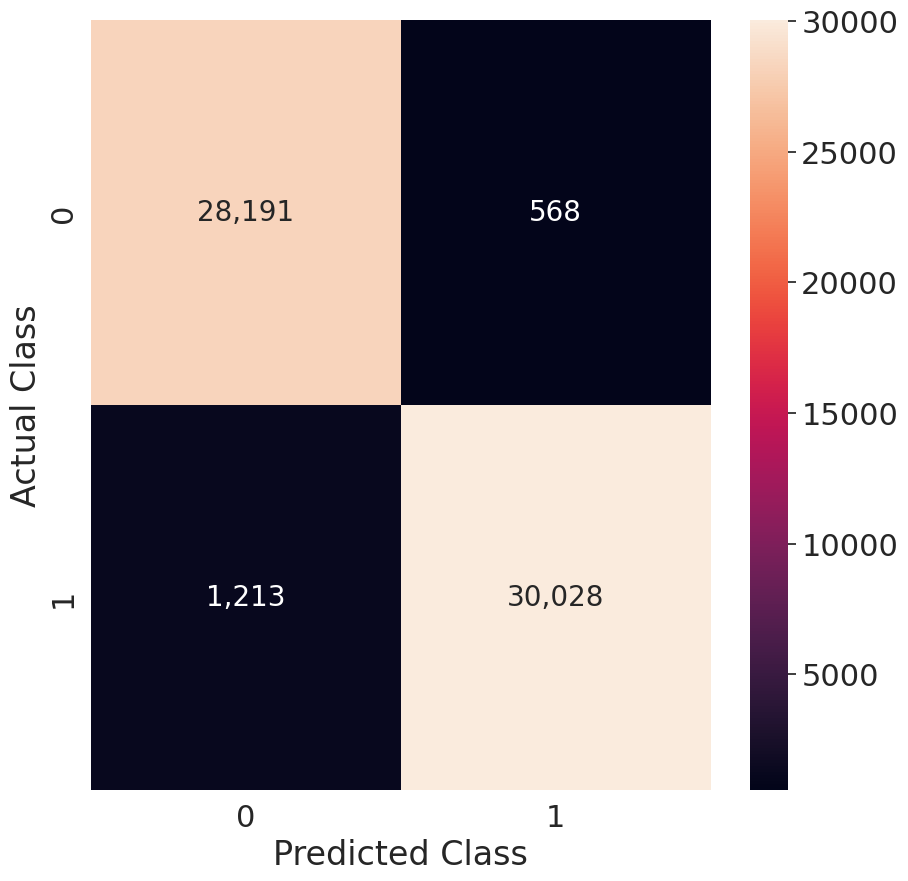

In [ ]:
import matplotlib.pyplot as plt # imports matplotlib.pyplot
import seaborn as sns # imports seaborn
%matplotlib inline
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=20, fmt:str=",",
                             cmap=None) -> plt.Figure:
  sns.set(font_scale=2)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt=fmt, ax=ax, cmap=cmap, annot_kws={"size": fsize})
  ax.set_xlabel("Predicted Class")
  ax.set_ylabel("Actual Class")
  return fig # defines the function to produce the confusion matrix heatmap

confusion_matrix_heatmap(cm) # produces heatmap of the confusion matrix for the training data
pass # displays heatmap of the confusion matrix for the training data

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_recode, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     29404
           1       0.96      0.98      0.97     30596

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [ ]:
y_test_pred = cross_val_predict(clf, X_test, y_test_recode) # generates cross-validated estimates for each data point using the developed model on the test data
cm = confusion_matrix(y_test_pred, y_test_recode) # creates confusion matrix from the cross-validated estimates and the training data
cm

array([[4850, 2715],
       [  11, 2424]])

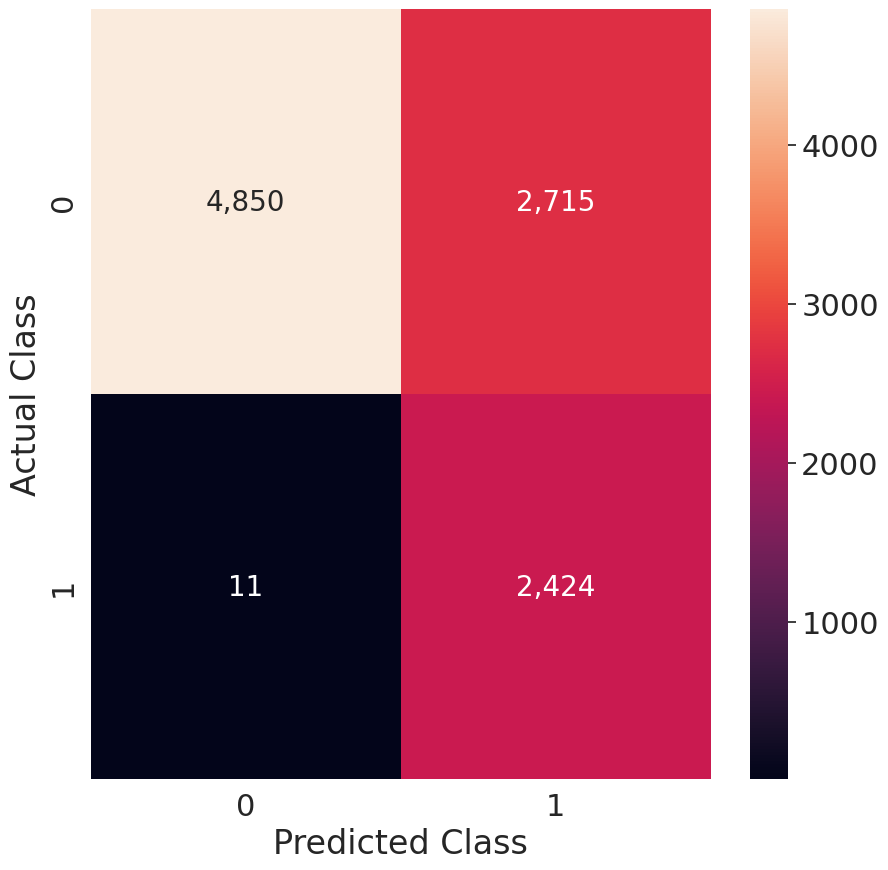

In [ ]:
confusion_matrix_heatmap(cm) # produces heatmap of the confusion matrix for the test data
pass # displays heatmap of the confusion matrix of the training data

In [ ]:
print(classification_report(y_test_recode, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4861
           1       1.00      0.47      0.64      5139

    accuracy                           0.73     10000
   macro avg       0.82      0.73      0.71     10000
weighted avg       0.82      0.73      0.71     10000

